<a href="https://colab.research.google.com/github/saworx/CDS-Forecast/blob/main/CDS%E6%8E%A5%E7%B6%9A%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CONNECT Data serviceクライアントをインストール

In [ ]:
# CDSクライアントをインストール
!pip install adh_sample_library_preview

config.iniのようなファイルをnotebookが参照できる場所に作成しておき、そのファイルに以下のような情報を記述する

[Configurations]  
Namespace = [PLACEHOLDER_REPLACE_WITH_NAMESPACE_ID]  
  
[Access]  
Resource = https://uswe.datahub.connect.aveva.com  
Tenant = [PLACEHOLDER_REPLACE_WITH_TENANT_ID]  
ApiVersion = v1  
  
[Credentials]  
ClientId = [PLACEHOLDER_REPLACE_WITH_APPLICATION_IDENTIFIER]  
ClientSecret = [PLACEHOLDER_REPLACE_WITH_APPLICATION_SECRET]  

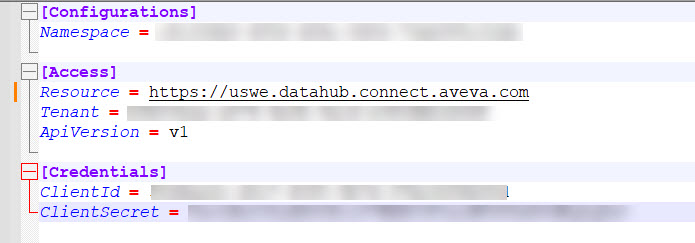

In [ ]:
import requests
import configparser
import json
import pandas as pd
from datetime import date, timedelta
from adh_sample_library_preview import *

numberOfPreviewRows = 5 #各ステップで出力される行数を５行とする

## 認証

In [ ]:
# Configを読み込む
config = configparser.ConfigParser()
config.read('/content/drive/MyDrive/ADH/configADHAPAC.ini')

ADHClient = ADHClient(config.get('Access', 'ApiVersion'), config.get('Access', 'Tenant'), config.get('Access', 'Resource'), config.get('Credentials', 'ClientId'), config.get('Credentials', 'ClientSecret'))

namespaceId = config.get('Configurations', 'Namespace')
namespaceId

##CDSからデータ取得

In [ ]:
dateFrom = '2024-03-05'
dateTo ='2024-03-06'
timeinterval = '00:01:00' #インターバル：１分間隔にする

#Data Viewを指定
dataviewId= "SA_Dryer"

#dataViewからデータ取得
data, n, f = ADHClient.DataViews.getDataInterpolated(namespace_id=namespaceId, data_view_id=dataviewId, count=150000,start_index=dateFrom, end_index=dateTo, interval=timeinterval)

# 5件だけアウトプット
data[:numberOfPreviewRows]


In [ ]:
# データフレーム定義
df = pd.DataFrame(data)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df[:numberOfPreviewRows]